In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [74]:
#function to load the data and randomise it and normalise it further
def loadData():
    df = pd.read_csv('population.csv', sep=",", index_col=False)
    df = df.sample(frac=1).reset_index(drop=True)
    
    toRemove=[]
    for i in df.columns:
        df.loc[df[i] == ' ?', i] = np.nan
        if(df[i].isna().sum()/len(df)>0.4):
            toRemove.append(i)
    print("Columns removed",toRemove) 
    for i in toRemove:
        df=df.drop(i,1)
        
    return df

In [106]:
populationData=loadData()

Columns removed ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']


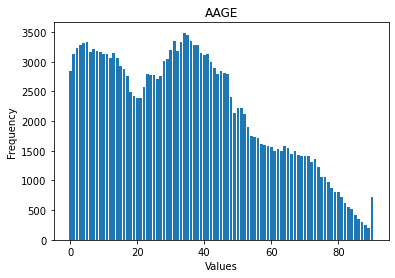

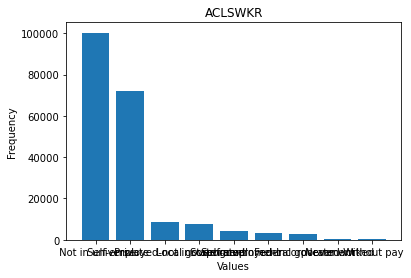

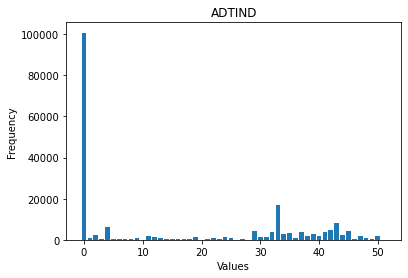

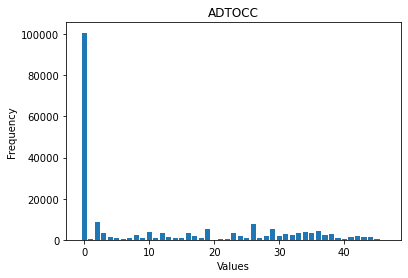

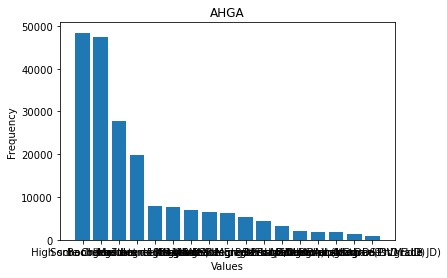

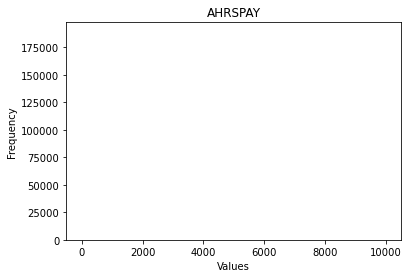

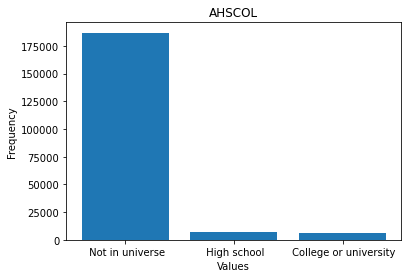

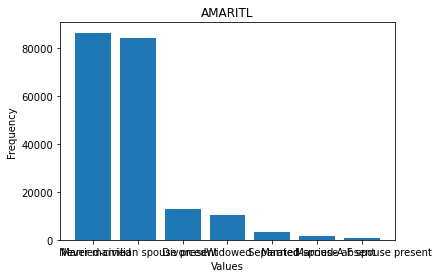

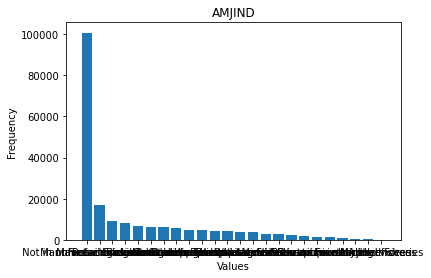

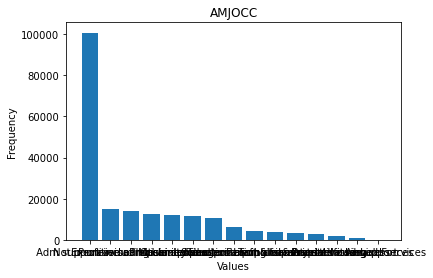

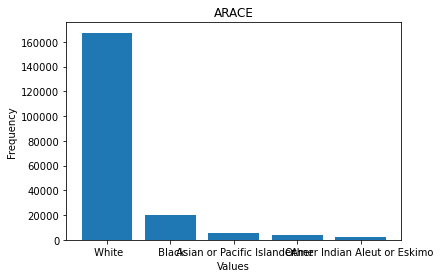

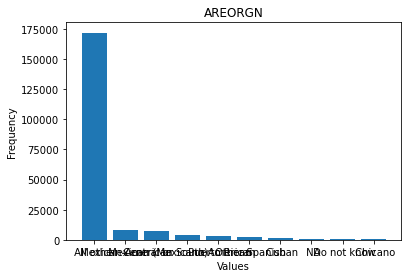

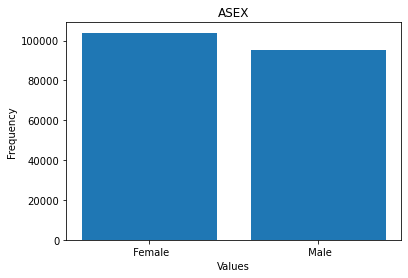

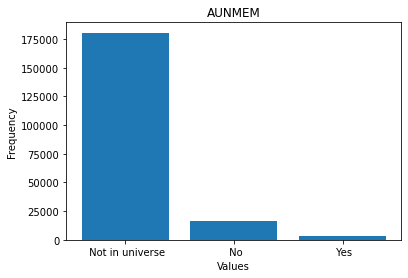

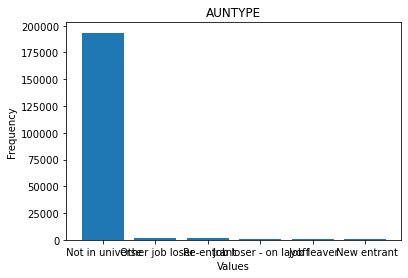

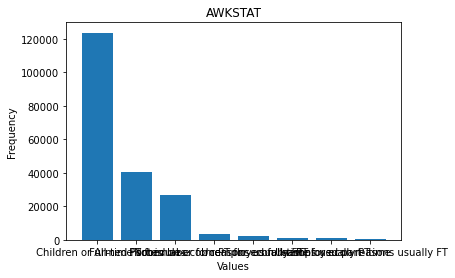

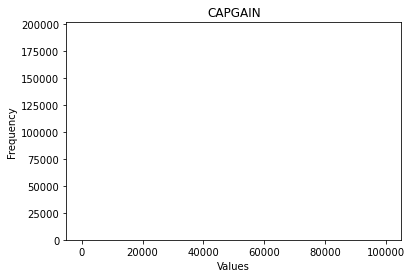

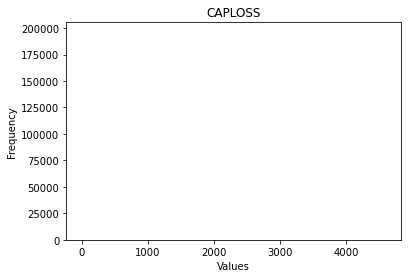

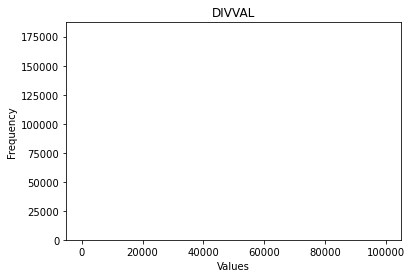

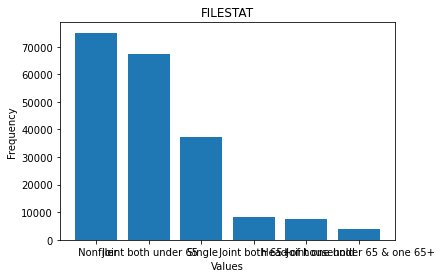

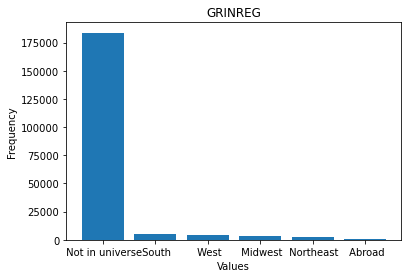

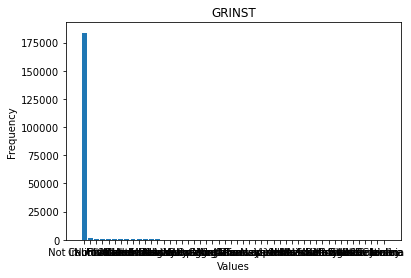

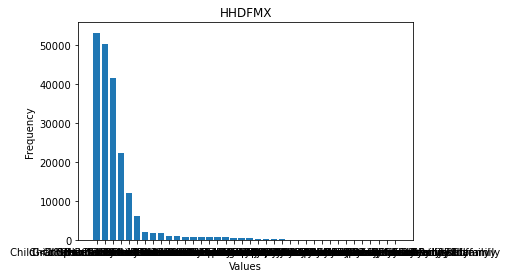

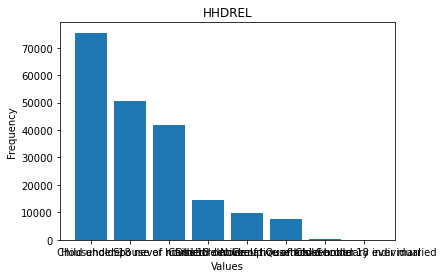

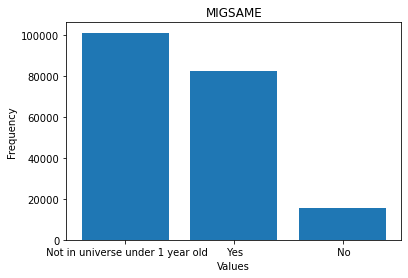

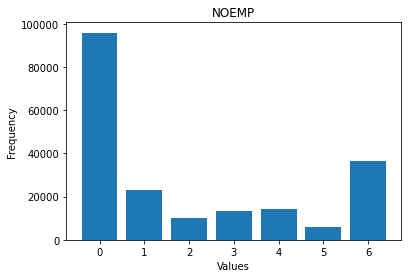

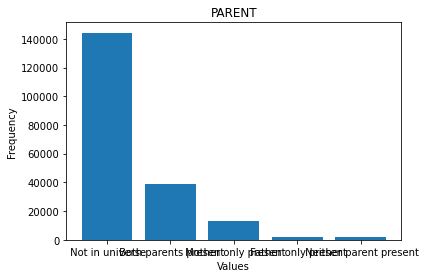

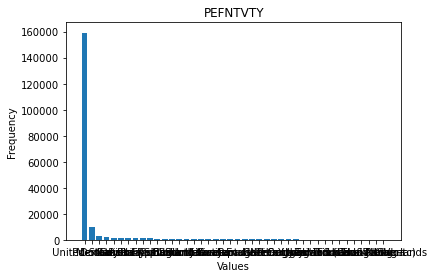

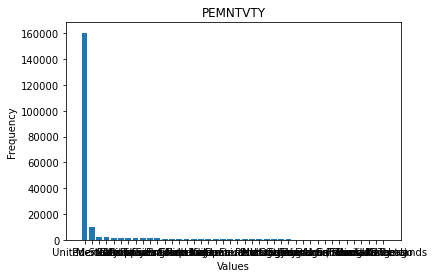

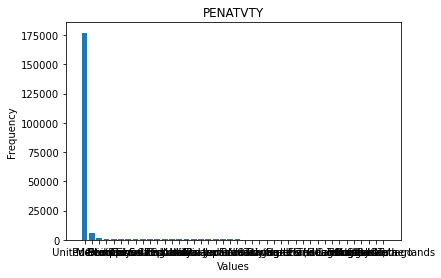

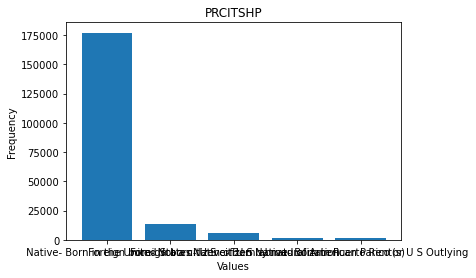

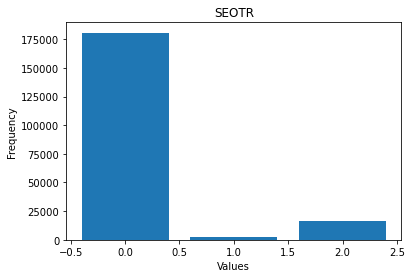

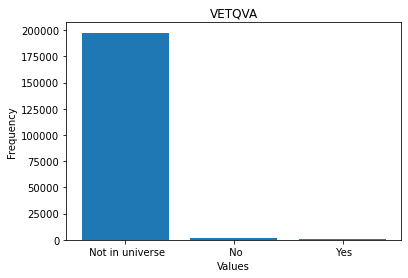

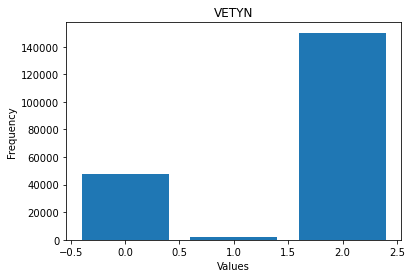

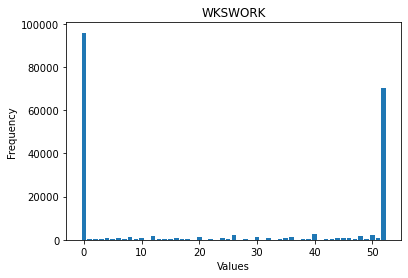

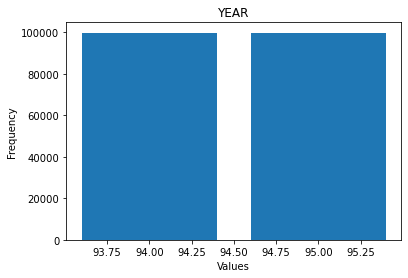

In [102]:
#plotting histogram
for i in populationData.columns:
    freq=populationData[i].value_counts()
    values=[]
    frequency=[]
    for j in freq.index:
        values.append(j)
        frequency.append(freq[j])
#     width = np.diff(values).min()
    plt.bar(values,frequency,align='center')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()
#     print("Above graph's x axis values are ",values)

In [107]:
#droping features having more than 80% of the frequency in one feature only
toRemove=[]
for i in populationData.columns:
    freq=populationData[i].value_counts()
    maxNum=0
    total=0
    for j in freq.index:
        maxNum=max(freq[j],maxNum)
        total+=freq[j]
    if(maxNum/total>0.8):
        toRemove.append(i)
        populationData=populationData.drop(i,1)

print("Columns removed are ",toRemove)
print(populationData.shape)
    

Columns removed are  ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA']
(199523, 19)


In [108]:
modeOfColumns={}

for i in populationData.columns:
    
    mode=populationData[i].mode()
    modeOfColumns[i]=mode[0]
    populationData[i].fillna(mode[0],inplace=True)

In [109]:
print(modeOfColumns)

{'AAGE': 34.0, 'ACLSWKR': ' Not in universe', 'ADTIND': 0.0, 'ADTOCC': 0.0, 'AHGA': ' High school graduate', 'AMARITL': ' Never married', 'AMJIND': ' Not in universe or children', 'AMJOCC': ' Not in universe', 'ASEX': ' Female', 'AWKSTAT': ' Children or Armed Forces', 'FILESTAT': ' Nonfiler', 'HHDFMX': ' Householder', 'HHDREL': ' Householder', 'MIGSAME': ' Not in universe under 1 year old', 'NOEMP': 0.0, 'PARENT': ' Not in universe', 'VETYN': 2.0, 'WKSWORK': 0.0, 'YEAR': 94.0}
